<font color='red' size='+4'><b>Movie reviews classification using NLTK and Logistic regression</b></font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<font size='+2'><b>Dataset</b></font>

In [ ]:
movie_reviews = pd.read_csv('/content/drive/MyDrive/Devoir2/train.csv', sep = 'delimiter', names = ['text'], skiprows=1)

# Separating IDs and labels from reviews
movie_reviews[['id', 'label', 'review']] = movie_reviews.text.str.split(",", n=2, expand = True)


# Drop unnecessary columns
movie_reviews = movie_reviews [['label', 'review']]
movie_reviews.head()

,label,review
0,1,Wizards of the Lost Kingdom is a movie about a...
1,1,Brilliant adaptation of the largely interior m...
2,1,Typical De Palma movie made with lot's of styl...
3,1,This is a fantastic series first and foremost....
4,1,My only minor quibble with the film I grew up ...


In [ ]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   25000 non-null  object
 1   review  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [ ]:
movie_reviews['label'] = movie_reviews['label'].astype(int)

Text(0, 0.5, 'Frequency')

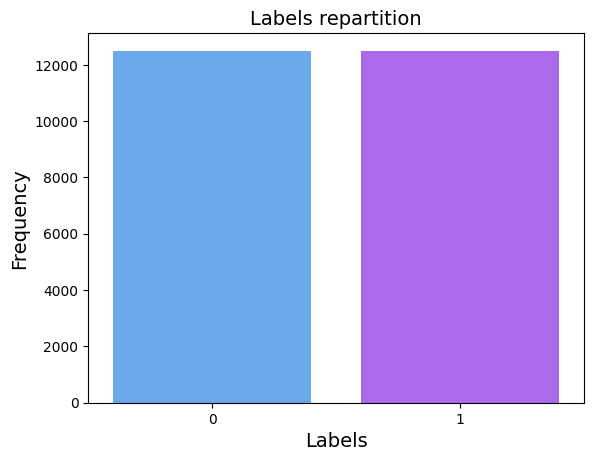

In [ ]:
palette = 'cool'
sns.set_palette(palette)
sns.countplot(data = movie_reviews, x = 'label', palette = palette)
plt.title("Labels repartition", fontsize = 14)
plt.xlabel('Labels', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

<font size='+2'><b>Vocabulary</b></font>

In [ ]:
# Vocabulary
txt = "/content/drive/MyDrive/Devoir2/vocab.txt"
vocab = np.loadtxt(txt, delimiter='\t', dtype=str)
print(vocab)

['the' 'and' 'a' ... 'kinky-sex' 'urrrghhh' 'investigator-like']


<font color = 'purple' size='+3'><b>Preprocessing</b></font>

In [ ]:
string.punctuation

# This function below removes all punctuations
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
# This function below removes all stopwords except 'not'
def remove_stopword(text):
    stopword = stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
# Preprocessing function
def preprocess_text(df):

    # Lowering all characters
    df['clean_review'] = df['review'].apply(lambda x: x.lower())

    # Removing punctuations
    df['clean_review'] = df['clean_review'].apply(lambda x:remove_punctuation(x))

    # Removing stopwords (except not)
    df['clean_review'] = df['clean_review'].apply(remove_stopword)

    # Lemmatization
    df["clean_review"] = df["clean_review"].apply(lemmatize_words)

    return df

preprocess_text(movie_reviews)

,label,review,clean_review
0,1,Wizards of the Lost Kingdom is a movie about a...,wizard lost kingdom movie young prince simon b...
1,1,Brilliant adaptation of the largely interior m...,brilliant adaptation largely interior monologu...
2,1,Typical De Palma movie made with lot's of styl...,typical de palma movie made lot style scene br...
3,1,This is a fantastic series first and foremost....,fantastic series first foremost well done inte...
4,1,My only minor quibble with the film I grew up ...,minor quibble film grew knowing stairway heave...
...,...,...,...
24995,0,I hate to even waste the time it takes to writ...,hate even waste time take write 10 line atroci...
24996,0,The whole Biker Movie genre has to be made up ...,whole biker movie genre made worst film ever m...
24997,0,This movie was horrible. I watched it three ti...,movie horrible watched three time not even who...
24998,0,"That's not the sound of bees, that's the effec...",thats not sound bee thats effect induced watch...


<font color = 'purple' size='+3'><b>Logistic Regression</b></font>

In [ ]:
vect = CountVectorizer(vocabulary = vocab)

tfid = TfidfTransformer(norm='l2', sublinear_tf=True)

In [ ]:
# Training and validation split
X_train, X_valid, y_train, y_valid = train_test_split(movie_reviews.clean_review, movie_reviews.label,
                                                    test_size=0.20,  random_state=1234, shuffle = True)

In [ ]:
Xtrain_vec = vect.fit_transform(X_train)
Xtrain_tfid = tfid.fit_transform(Xtrain_vec)

Xvalid_vec = vect.transform(X_valid)
Xvalid_tfid = tfid.transform(Xvalid_vec)

In [ ]:
# Model
lr = LogisticRegression(penalty = 'l2', solver = "saga", max_iter = 10000, random_state=22, C = 10)
lr.fit(Xtrain_tfid, y_train)

LogisticRegression(C=10, max_iter=10000, random_state=22, solver='saga')

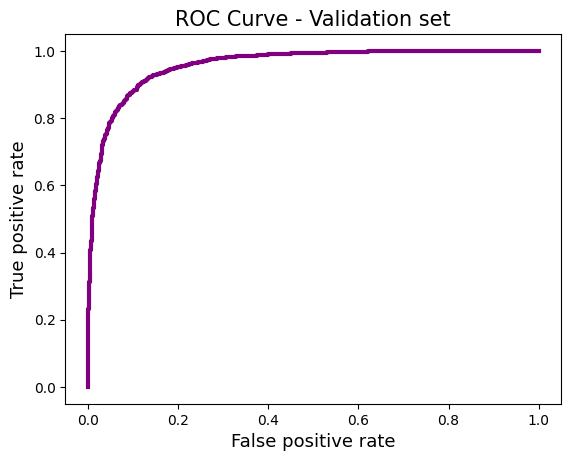

In [ ]:
# Class probabilities prediction - validation set
p_hat_val = lr.predict_proba(Xvalid_tfid)

# P(DEFAULT = 1) predictions
p_hat_val_class1 = p_hat_val[:,1]


# False positive and true positive rates and the corresponding thresholds (cutoffs)
fpr, tpr, thresholds = metrics.roc_curve(y_valid, p_hat_val_class1)


# Displaying ROC curve (validation set)
ROC = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr)
ROC.plot(linewidth=3, color='purple')
plt.title('ROC Curve - Validation set', fontsize = 15)
plt.xlabel("False positive rate", fontsize = 13)
plt.ylabel("True positive rate", fontsize = 13)
plt.show()

In [ ]:
def find_optimal_cutoff(model, X, y):

    fpr, tpr, thresholds = metrics.roc_curve(y, model.predict_proba(X)[:, 1])

    # fnr stands for false negative rate
    fnr = 1 - tpr

    min_distance = float('inf')
    best_cutoff = None
    for i, threshold in enumerate(thresholds):
        distance = np.sqrt((fnr[i])**2 + (fpr[i])**2)
        if distance < min_distance:
            min_distance = distance
            best_cutoff = threshold

    return best_cutoff

In [ ]:
cut_opt = find_optimal_cutoff(lr, Xvalid_tfid, y_valid)
print(cut_opt)

# Class prediction - validation set
y_val_hat = [1 if prob > cut_opt else 0 for prob in p_hat_val_class1]

# Confusion matrix - validation set
conf_mat_val = metrics.confusion_matrix(y_valid, y_val_hat)
conf_mat_val

0.4946701174026997


array([[2226,  286],
       [ 250, 2238]])

In [ ]:
fpr_val = conf_mat_val[0,1] / (conf_mat_val[0,0] + conf_mat_val[0,1])
fnr_val = conf_mat_val[1,0] / (conf_mat_val[1,0] + conf_mat_val[1,1])

print(f'AUC: {metrics.roc_auc_score(y_valid, y_val_hat)}')
print(f'Accuracy: {metrics.accuracy_score(y_valid, y_val_hat) * 100:.2f}%')
print("False positive rate: {:.2f}%".format(fpr_val * 100))
print("False negative rate: {:.2f}%".format(fnr_val * 100))
print(f'Precision: {metrics.precision_score(y_valid, y_val_hat) * 100:.2f}%')
print(f'Sensivity (true positive rate) : {metrics.recall_score(y_valid, y_val_hat) * 100:.2f}%')
print(f'Specificity (true negative rate): {metrics.recall_score(y_valid, y_val_hat, pos_label=0) * 100:.2f}%')

print("\n")
print("\n")
print("\033[4m" + "Classification report - Validation set" + "\033[0m")
print("\n")
print(metrics.classification_report(y_valid, y_val_hat))

AUC: 0.8928320908513732
Accuracy: 89.28%
False positive rate: 11.39%
False negative rate: 10.05%
Precision: 88.67%
Sensivity (true positive rate) : 89.95%
Specificity (true negative rate): 88.61%




Classification report - Validation set


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2512
           1       0.89      0.90      0.89      2488

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



<font color = 'purple' size='+3'><b>Hyperparameters tuning using Grid Search and Cross-validation</b></font>

In [ ]:
lr_grid = LogisticRegression(max_iter=10000, random_state = 22)


param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}


grid_search = GridSearchCV(estimator=lr_grid, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

grid_search.fit(Xtrain_tfid, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [ ]:
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")


best_model = grid_search.best_estimator_
val_score = best_model.score(Xvalid_tfid, y_valid)

print(f"Validation Set Score: {val_score}")

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9544435820472191
Validation Set Score: 0.8926
